# 
<h1 style="color: teal;">2D Deconvolution Benchmark: Python SimpleITK</h1>

---
## Setup

In [2]:
import numpy as np
from skimage.io import imread, imsave
from skimage import data
from skimage import img_as_float32 as img_as_float
from skimage.filters import gaussian
from scipy.ndimage import convolve
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
import matplotlib.pyplot as plt
import imageio.v2 as iio

/Users/yi/Library/Python/3.9/lib/python/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/Users/yi/Library/Python/3.9/lib/python/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")
/Users/yi/Library/Python/3.9/lib/python/site-packages/napari_skimage_regionprops/_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


### Generación de imagen borrosa y generación de PSF (imagen cells3D, plano central)

In [142]:
image =  data.cells3d()[30,1]
image.shape

(256, 256)

(-0.5, 255.5, 255.5, -0.5)

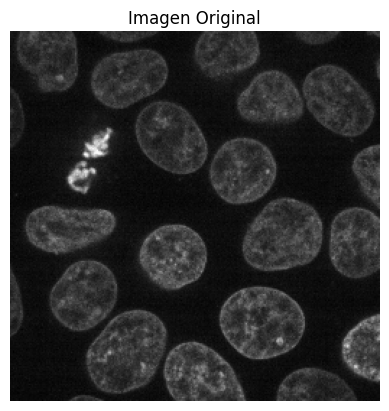

In [143]:
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off') 

Creación de la PSF

(-0.5, 255.5, 255.5, -0.5)

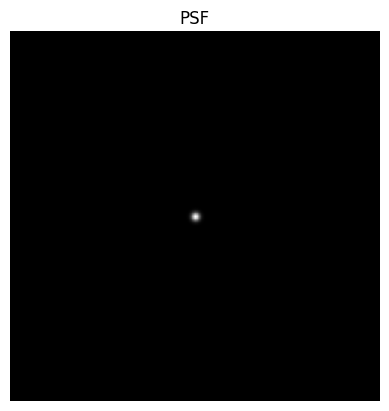

In [144]:
perfect_psf = np.zeros(image.shape)
cx, cy = int(image.shape[0]/2), int(image.shape[1]/2)
perfect_psf[cx, cy] = 1
psf = gaussian(perfect_psf, sigma=2)
psf = psf / psf.sum()
# Guardar ambos arrays en un archivo
#np.save("2d_cell_psf_test.npy", psf)

plt.imshow(psf, cmap='gray')
plt.title('PSF')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

Creación de la imagen a emplear

(-0.5, 255.5, 255.5, -0.5)

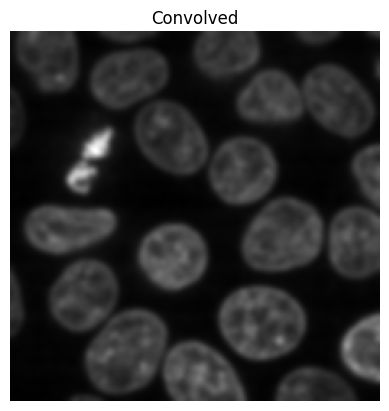

In [145]:
convolved = convolve(image, psf)
# Guardar ambos arrays en un archivo
#np.save("2d_cell_imgborrosa.npy", convolved)

plt.imshow(convolved, cmap='gray')
plt.title('Convolved')
plt.axis('off') 

---
## Test image

In [6]:
# Cargar imagen degradada y PSF
img_blurred = np.load("ImagenesEmpleadas2D/imagen_borrosa.npy")
psf_test = np.load("ImagenesEmpleadas2D/test_psf.npy")

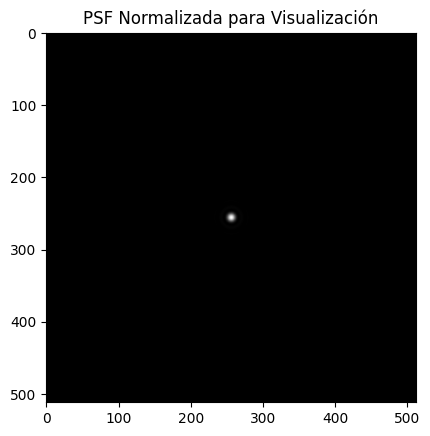

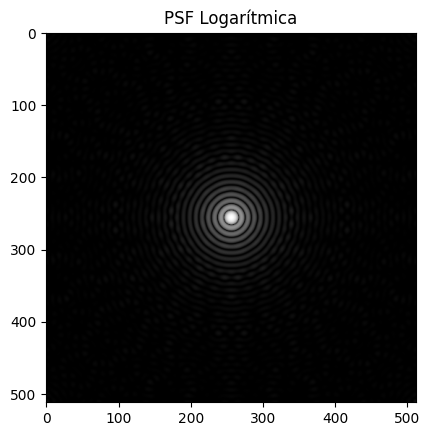

In [4]:

# 1️⃣ Visualización normalizada (0 a 1)
psf_vis = psf_test / psf_test.max()
plt.imshow(psf_vis, cmap='gray')
plt.title("PSF Normalizada para Visualización")
plt.show()

# 2️⃣ Visualización logarítmica (resalta bordes débiles)
psf_log = np.log(psf_test + 1e-6)  # +1e-6 para evitar log(0)
plt.imshow(psf_log, cmap='gray')
plt.title("PSF Logarítmica")
plt.show()

In [5]:
# Aplicar deconvolucion Richardson-Lucy
number_of_iterations = 30
deconv_test = richardson_lucy_deconvolution(img_blurred, psf_test, number_of_iterations)


(-0.5, 511.5, 511.5, -0.5)

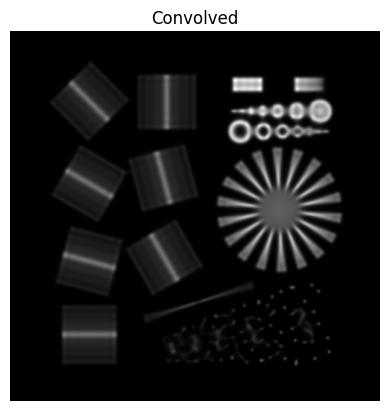

In [6]:
plt.imshow(deconv_test, cmap='gray')
plt.title('Resultado Deconvolución RL')
plt.axis('off') 

In [9]:
plt.imsave("2D_result_image_text_simpleITK.png", deconv_test, cmap='gray')


In [149]:
# Medición del tiempo
%timeit -n 1 -r 100 richardson_lucy_deconvolution(img_blurred, psf_test, number_of_iterations)

6.37 s ± 40.2 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


---
## Cell

### Cargamos las imagen y PSF a utilizar

In [3]:
# Cargar imagen degradada y PSF
img_cells = np.load("ImagenesEmpleadas2D/2d_cell_imgborrosa.npy")
psf_cells = np.load("ImagenesEmpleadas2D/2d_cell_psf_test.npy")

(-0.5, 255.5, 255.5, -0.5)

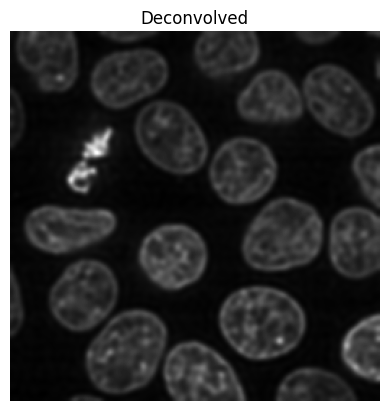

In [4]:
number_of_iterations = 30
deconv_cells = richardson_lucy_deconvolution(img_cells, psf_cells, number_of_iterations)

plt.imshow(deconv_cells, cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [14]:
plt.imsave("2D_result_cells_simpleITK.png", deconv_cells, cmap='gray')

In [152]:
# imsave("cells3d_convolved.tif",convolved)
# imsave("cells3d_psf.tif",psf)

In [153]:
%timeit -n 1 -r 100  richardson_lucy_deconvolution(img_cells, psf_cells, number_of_iterations)

1.46 s ± 7.87 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [154]:
%timeit -n 10 -r 10  richardson_lucy_deconvolution(img_cells, psf_cells, number_of_iterations)

1.46 s ± 4.56 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
